# **Importing Packages**

---

In [83]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

# **Importing Project Data**

---

Importing Avaiation_Data.csv:

In [84]:
df = pd.read_csv('Aviation_Data.csv', low_memory=False)

Identify **column names** and how many cells are **empty**:

In [85]:
df.isna().sum().sort_values(ascending=False)

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

# **Cleaning Data**

---

Adjusts all columns titles to lower-case + replaces the " . " with " _ ":

In [86]:
df = df.rename(columns={c: c.lower().replace('.', '_') for c in df.columns})

Selecting all of the columns needed and using the same Data Frame name 'df':

In [87]:
df = df[['location','investigation_type','event_date','country','injury_severity','aircraft_damage','aircraft_category','make', 'model','number_of_engines', 'engine_type', 'air_carrier', 'total_fatal_injuries', 'total_uninjured', 'total_serious_injuries', 'total_minor_injuries','weather_condition', 'airport_code', 'airport_name', 'latitude','longitude', 'amateur_built']]



Clean country to make lowercase + Refining to **'United States'**:

In [88]:
df['country'] = df['country'].str.lower()

In [89]:
df = df[df['country'] == 'united states']

Cleaning '**location**' + adding '**state**' column:

In [90]:
df['location'] = df['location'].str.lower()
df['state'] = df['location'].str[-2:]
df.dropna(subset=['location'], inplace=True)

show 'states' list:

In [91]:
list(df['state'].value_counts().items())

[('ca', 8857),
 ('tx', 5913),
 ('fl', 5825),
 ('ak', 5672),
 ('az', 2834),
 ('co', 2726),
 ('wa', 2613),
 ('il', 2060),
 ('mi', 2030),
 ('ga', 2023),
 ('ny', 1915),
 ('oh', 1823),
 ('pa', 1790),
 ('or', 1772),
 ('nc', 1661),
 ('mo', 1565),
 ('wi', 1560),
 ('ar', 1519),
 ('mn', 1456),
 ('id', 1436),
 ('nm', 1358),
 ('ut', 1336),
 ('in', 1320),
 ('va', 1275),
 ('ok', 1240),
 ('nv', 1236),
 ('la', 1216),
 ('nj', 1170),
 ('al', 1153),
 ('tn', 1108),
 ('ks', 1104),
 ('mt', 1050),
 ('sc', 974),
 ('ma', 969),
 ('ia', 819),
 ('md', 815),
 ('ms', 813),
 ('wy', 739),
 ('ne', 725),
 ('ky', 650),
 ('nd', 561),
 ('me', 505),
 ('ct', 502),
 ('hi', 499),
 ('sd', 446),
 ('wv', 394),
 ('nh', 368),
 ('vt', 241),
 ('ri', 158),
 ('de', 114),
 ('pr', 114),
 ('gm', 44),
 ('dc', 42),
 ('ao', 17),
 ('of', 17),
 ('n,', 15),
 ('po', 14),
 ('o,', 12),
 ('gu', 8),
 ('a,', 8),
 ('vi', 6),
 ('g,', 5),
 ('un', 3),
 ('e,', 3),
 ('9,', 3),
 (',', 3),
 ('x,', 3),
 ('d,', 2),
 ('7,', 1),
 ('l,', 1),
 ('m,', 1),
 ('y,', 

(2) **Investigation_Type**:

In [92]:
print(f"Accidents: {df['investigation_type'].value_counts()['Accident']}")
print(f"Incidents: {df['investigation_type'].value_counts()['Incident']}")
# What is the difference????

Accidents: 79895
Incidents: 2342


Filtering '**Event_date**' to 2001-11-19 and greater: 

In [93]:
df = df[df['event_date'] >= '2001-11-19']

Examining '**injury_severity**' data: 

In [94]:
df['injury_severity'].value_counts()

# Not sure what minor/incident/'49' means...

Non-Fatal    25564
Fatal         3556
Fatal(1)      1096
Fatal(2)       629
Incident       334
Minor          203
Fatal(3)       191
Serious        153
Fatal(4)        99
Fatal(5)        39
Fatal(6)        10
Fatal(7)         3
Fatal(10)        2
Fatal(8)         2
Fatal(21)        1
Fatal(13)        1
Fatal(20)        1
Fatal(49)        1
Name: injury_severity, dtype: int64

Examining '**aircraft_damage**' data:

In [95]:
df['aircraft_damage'].value_counts()

# Posibly combine all of these? Why does the breakdown matter?

Substantial    26826
Destroyed       3530
Minor            717
Unknown           50
Name: aircraft_damage, dtype: int64

Examining '**aircraft_category**' data:

In [96]:
print('1.')
print(f"** {df['aircraft_category'].isna().sum()} empty cells in this column") # 7625 empy cells
print()
print()
print()
print('2.')
print(df['aircraft_category'].value_counts())

1.
** 7618 empty cells in this column



2.
Airplane             20870
Helicopter            2404
Glider                 450
Balloon                199
Weight-Shift           161
Gyrocraft              157
Powered Parachute       90
Ultralight              24
WSFT                     9
Blimp                    3
Powered-Lift             3
Unknown                  3
Rocket                   1
ULTR                     1
Name: aircraft_category, dtype: int64


Examining '**number_of_engines**' data: 

In [97]:
print('1)')
print(f"** {df['number_of_engines'].isna().sum()} empty cells in this column") # 1053 empy cells
print()
print()
print()
print('2)')
print(df['number_of_engines'].value_counts())

1)
** 1052 empty cells in this column



2)
1.0    26618
2.0     3681
0.0      514
4.0       74
3.0       50
8.0        3
6.0        1
Name: number_of_engines, dtype: int64


Cleaning '**make' & 'model**':

In [98]:
## make
df['make'] = df['make'].str.lower()
df['make'].value_counts(ascending=False) 


cessna              8432
piper               4775
beech               1779
bell                 797
boeing               567
                    ... 
murray frank h         1
haines                 1
killgore               1
sacrey w michael       1
royse ralph l          1
Name: make, Length: 4722, dtype: int64

In [99]:
# dropping 13 missing items:
df.dropna(subset=['make'], inplace=True)

df['make'].isna().sum()

0

In [100]:
## model 
df['model'] = df['model'].str.lower()
df['model'].value_counts(ascending=False)


172             734
152             395
172s            347
172n            339
182             266
               ... 
dhc-2 / u-6a      1
pa-28c-235        1
369f              1
t-34b             1
pa42              1
Name: model, Length: 6219, dtype: int64

In [101]:
# dropping 15 missing items:
df.dropna(subset=['model'], inplace=True)

df['model'].isna().sum()

0

Visualizing the top 30 Makes & Models:

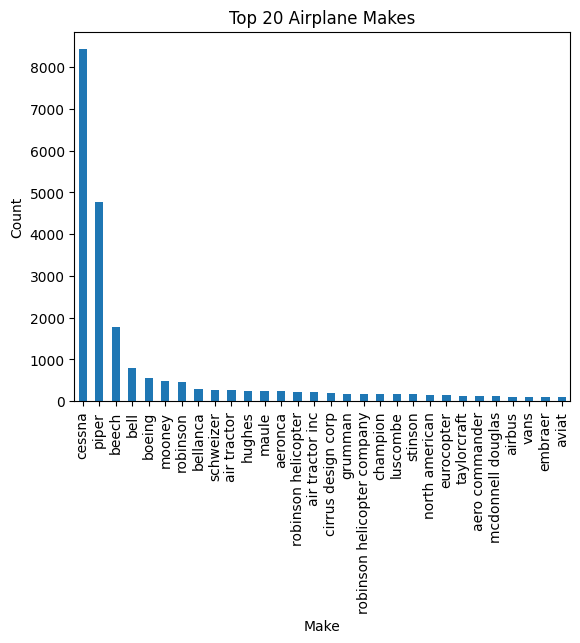

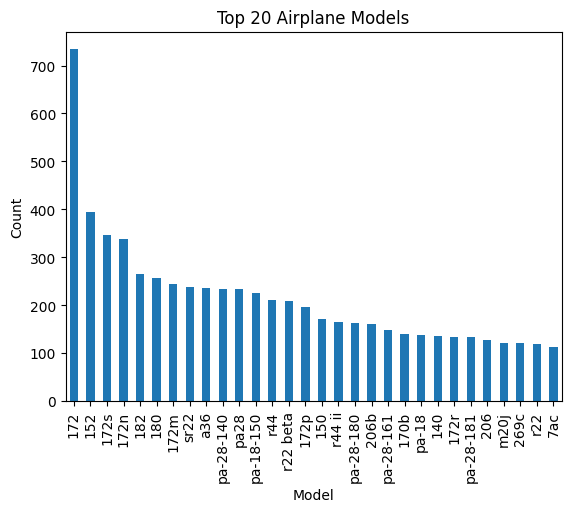

In [102]:
df['make'].value_counts().head(30).plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Top 20 Airplane Makes')
plt.show()  # This will display the plot

df['model'].value_counts().head(30).plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 20 Airplane Models')
plt.show()  # This will display the plot


Visualizing the number of accidents and Incidents:

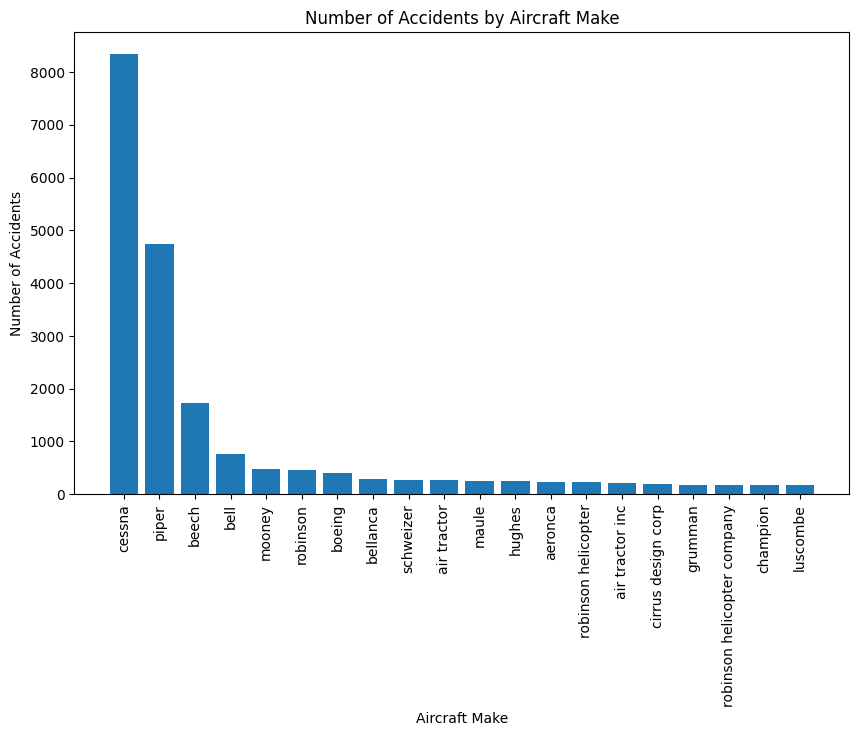

In [103]:
accidents_df = df[df['investigation_type'] == 'Accident']

# Get the counts of each 'make'
counts = accidents_df['make'].value_counts().head(20)

# Get the categories (makes) and their corresponding accident counts
categories = counts.index
accidents = counts.values

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(categories, accidents)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Aircraft Make')
plt.show()



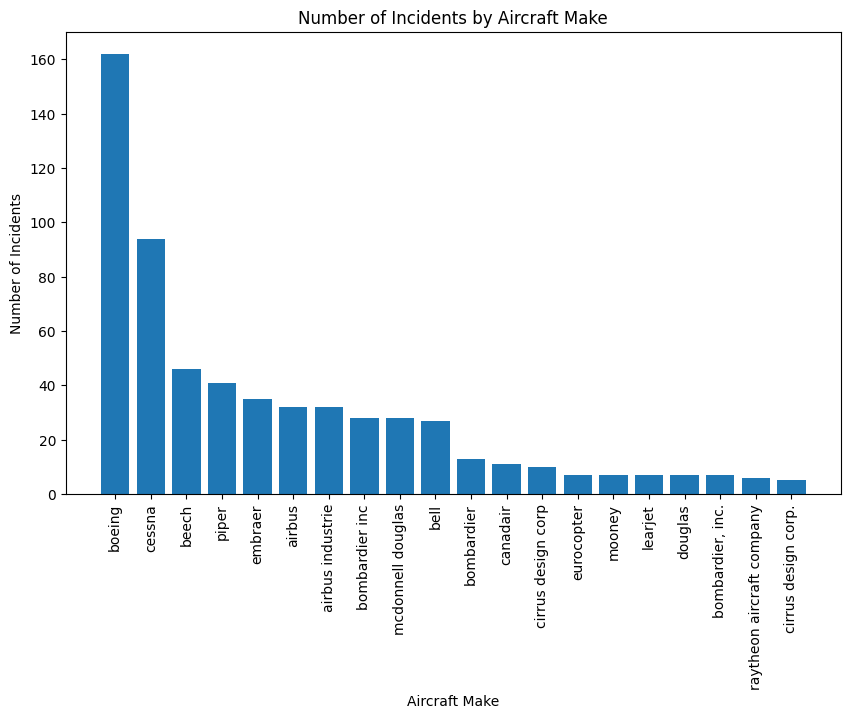

In [104]:
# Filter rows that have 'Incident' in the 'investigation_type' column
incidents_df = df[df['investigation_type'] == 'Incident']

# Get the counts of each 'make'
counts = incidents_df['make'].value_counts().head(20)

# Get the categories (makes) and their corresponding incident counts
categories = counts.index
incidents = counts.values

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(categories, incidents)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Aircraft Make')
plt.show()

Cleaning format of values + Filter Out '**amateur_built**' values:

In [105]:
df['amateur_built'] = df['amateur_built'].str.lower()
df = df[df['amateur_built'] == 'no']

In [106]:
df.isna().sum().sort_values(ascending=False)

air_carrier               16921
airport_code               8964
airport_name               8806
total_serious_injuries     8397
total_fatal_injuries       7956
total_minor_injuries       7871
aircraft_category          6666
total_uninjured            3347
engine_type                2682
number_of_engines           883
aircraft_damage             854
weather_condition           595
longitude                   581
latitude                    574
injury_severity             102
amateur_built                 0
location                      0
investigation_type            0
model                         0
make                          0
country                       0
event_date                    0
state                         0
dtype: int64

# **Refining to Commercial Planes Only**

Identifying which **engine_type** is used for commercial planes and filtering accordingly:

In [120]:
df['engine_type'].value_counts()
# Research:
# 
# 
# 


Reciprocating    20955
Turbo Prop        1523
Turbo Shaft       1457
Turbo Fan          957
Turbo Jet          213
Unknown             22
None                18
Electric            10
LR                   2
Hybrid Rocket        1
UNK                  1
NONE                 1
Name: engine_type, dtype: int64

In [107]:
df.head()

,location,investigation_type,event_date,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,...,total_uninjured,total_serious_injuries,total_minor_injuries,weather_condition,airport_code,airport_name,latitude,longitude,amateur_built,state
51801,"patterson, la",Accident,2001-11-19,united states,Fatal(1),Substantial,NaN,grumman american,aa-1b,1.0,...,NaN,NaN,NaN,VMC,PTN,Harry P. Williams Memorial,29.713333,-91.331945,no,la
51802,"fairhope, al",Accident,2001-11-20,united states,Non-Fatal,Substantial,NaN,cessna,175a,1.0,...,2.0,NaN,NaN,IMC,AL78,Klumpp Field,30.461667,-87.9,no,al
51803,"stuart, fl",Accident,2001-11-20,united states,Non-Fatal,Substantial,NaN,cessna,150m,1.0,...,NaN,NaN,1.0,VMC,NaN,NaN,27.083056,-80.341111,no,fl
51804,"evans, ga",Accident,2001-11-20,united states,Non-Fatal,Substantial,NaN,piper,pa-24-250,1.0,...,NaN,1.0,NaN,VMC,NaN,NaN,33.371945,-82,no,ga
51805,"crystal river, fl",Accident,2001-11-20,united states,Non-Fatal,Substantial,NaN,cessna,172m,1.0,...,1.0,NaN,NaN,VMC,CGC,Crystal River Airport,NaN,NaN,no,fl
